In [36]:
#importing neccessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR




In [37]:
#loading data
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [38]:
#checking null values
df.isna().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [39]:
#checking unique values count
for i in df.columns[1:-1]:
  print(df[i].value_counts())

A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64
A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64
A-    116
B+    101
B      96
A      56
B-     54
C+     41
D+     29
C-     27
D      24
C      18
A+      4


In [40]:
#replacing nan valus with "F" as "F" does not affect cgpa
df=df.apply(lambda x: x.fillna('F'))

In [41]:
#replacing W with F as both do not affect cgpa
df=df.apply(lambda x: x.replace('W','F'))

In [42]:
#replacing WU with F as both don't affect cgpa
df=df.apply(lambda x: x.replace('WU','F'))

In [43]:
#Checking null valus after replacing nan with F
df.isna().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

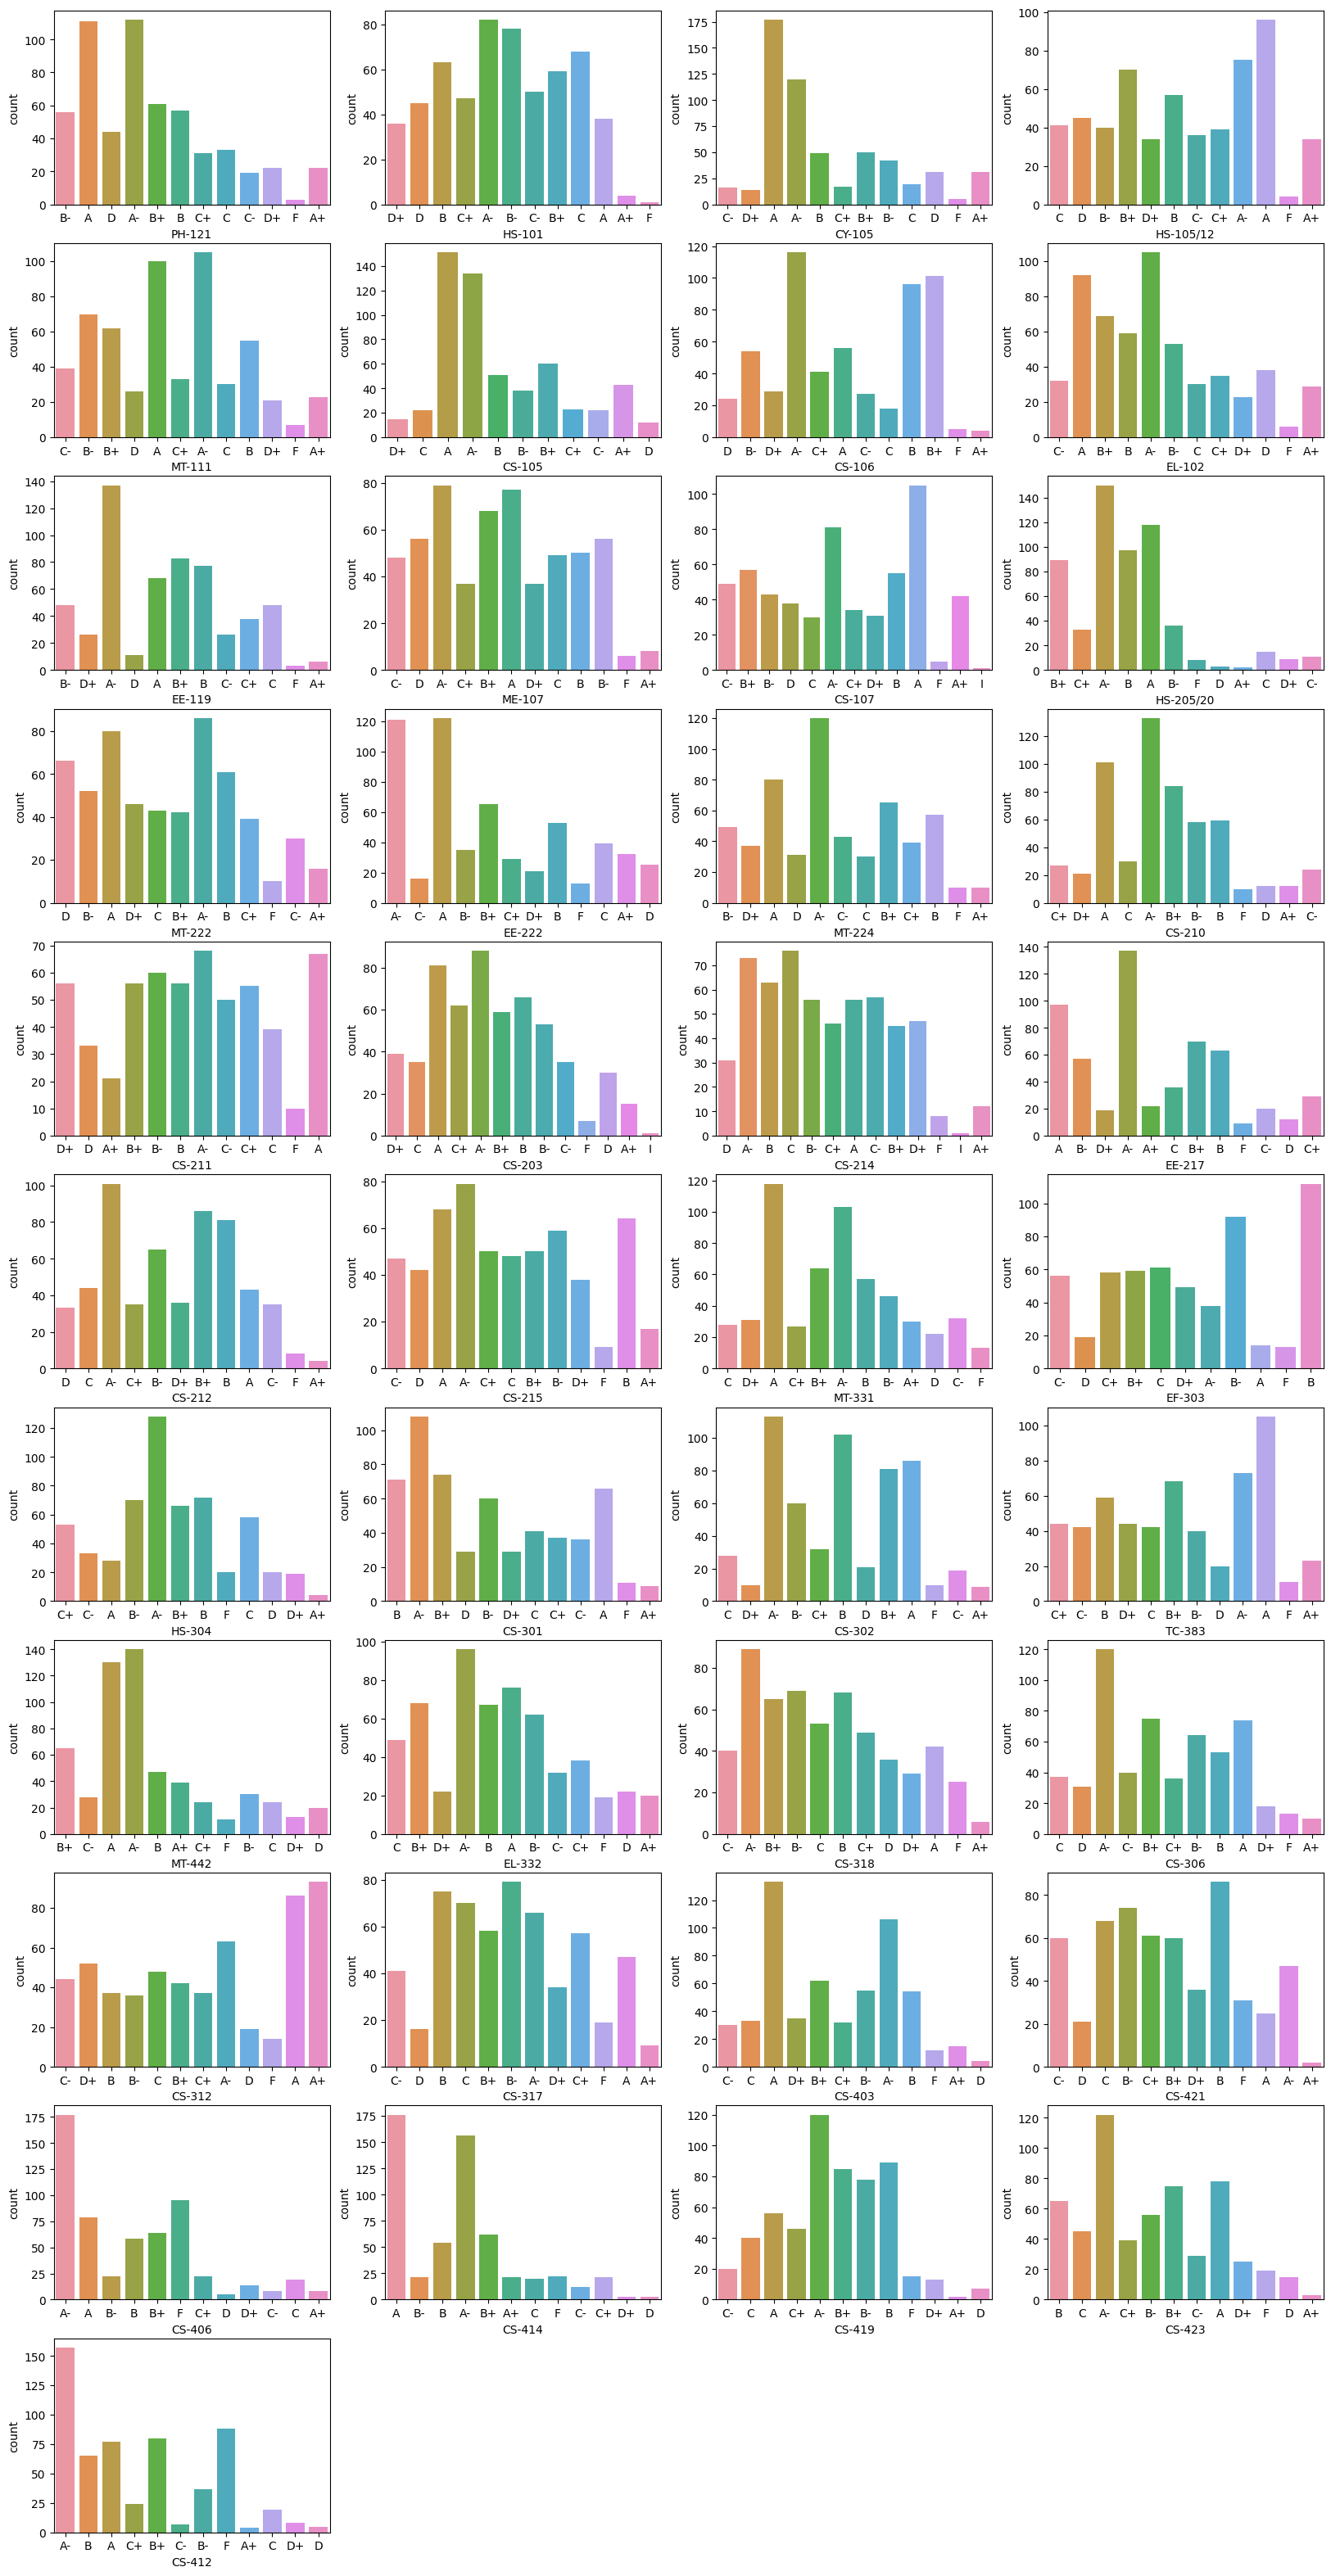

In [44]:
#ploting the grade count in each course
plt.figure(figsize=(20,40))
plotnumber=1
for i in df.columns[1:-1]:
  plt.subplot(11,4,plotnumber)
  sns.countplot(df,x=df[i])
  plotnumber+=1
plt.show()

In [45]:
#encoding featuers having 13 unique values by there order
encoder=OrdinalEncoder()
df[df.columns[1:-1]]=encoder.fit_transform(df[df.columns[1:-1]])

In [46]:
#droping seat no feature as it is not usful to predict cgpa
df.drop('Seat No.',axis=1,inplace=True)

In [47]:
#Separating feature and label
X=df.drop('CGPA',axis=1)
y=df['CGPA']

In [48]:
#featuer Scaling
scal=StandardScaler()
x_scal=scal.fit_transform(X)

**Model Building**

In [49]:
#finding reliable random state
maxscore=0
ind=0
for i in range(100):
  xr_train,xr_test,yr_train,yr_test=train_test_split(x_scal,y,test_size=0.20,random_state=i)
  lrt=LinearRegression()
  lrt.fit(xr_train,yr_train)
  yr_pred=lrt.predict(xr_test)
  scr=r2_score(yr_test,yr_pred)
  if scr > maxscore:
    maxscore=scr
    ind=i

print('maxscore {} at random state {}'.format(maxscore,ind))

maxscore 0.9822849916225777 at random state 77


In [50]:
#spliting trainig and testing data
x_train,x_test,y_train,y_test=train_test_split(x_scal,y,test_size=0.20,random_state=ind)

In [51]:
def fit_model(alg,x1,x2,y1,y2):
  alg.fit(x1,y1)
  print('---Training Score---')
  print(r2_score(y1,alg.predict(x1)))
  print('-'*20)
  print('\n---Testing Score---')
  y_pred=alg.predict(x2)
  print('\n r2_score :',r2_score(y2,y_pred))
  print('\n MAE : ',mean_absolute_error(y2,y_pred))
  return alg

In [52]:
#LinearRegressor model building
lr=fit_model(LinearRegression(),x_train,x_test,y_train,y_test)


---Training Score---
0.9564742735721969
--------------------

---Testing Score---

 r2_score : 0.9822849916225777

 MAE :  0.06519712332254442


In [53]:
#KNeighborsRegressor model building
kn=fit_model(KNeighborsRegressor(),x_train,x_test,y_train,y_test)


---Training Score---
0.9627831017815828
--------------------

---Testing Score---

 r2_score : 0.9460692189492078

 MAE :  0.10113217391304348


In [54]:
#DecisionTreeRegressor model building
dt=fit_model(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

---Training Score---
1.0
--------------------

---Testing Score---

 r2_score : 0.8724173293004545

 MAE :  0.1837217391304348


In [55]:
#RandomForestRegressoer  model building
rf=fit_model(RandomForestRegressor(),x_train,x_test,y_train,y_test)

---Training Score---
0.9907206216857282
--------------------

---Testing Score---

 r2_score : 0.9539852961270424

 MAE :  0.1007755652173912


In [56]:
#AdaBoostRegressor  model building
abr=fit_model(AdaBoostRegressor(),x_train,x_test,y_train,y_test)

---Training Score---
0.9452587303858593
--------------------

---Testing Score---

 r2_score : 0.9355723057466311

 MAE :  0.13141931009577784


In [57]:
#GradientBoostingRegressor  model building
gbr=fit_model(GradientBoostingRegressor(),x_train,x_test,y_train,y_test)

---Training Score---
0.9963058261919203
--------------------

---Testing Score---

 r2_score : 0.9648193736172432

 MAE :  0.08952364215520789


In [58]:
#SVR  model building
svr=fit_model(SVR(),x_train,x_test,y_train,y_test)

---Training Score---
0.9863570220209564
--------------------

---Testing Score---

 r2_score : 0.9659777653886741

 MAE :  0.073903011687636


**Cross Validation**

In [59]:
def cross_val(cv_alg,cv_tr_alg,x1_scal,y1_,cv_xtest,cv_ytest,cv):
  cv_mean=cross_val_score(cv_alg,x1_scal,y1_,cv=cv).mean()*100
  print('CV Mean: ',cv_mean,'\n')
  cv_r2scr=r2_score(cv_ytest,cv_tr_alg.predict(cv_xtest))*100
  print('r2 score: ',cv_r2scr)
  print('\n Difference between cv mean and r2 score')
  print(np.abs(cv_mean - cv_r2scr))

In [60]:
#Cross Validation of LinearRegressor
cross_val(LinearRegression(),lr,x_scal,y,x_test,y_test,10)

CV Mean:  95.08844027757539 

r2 score:  98.22849916225776

 Difference between cv mean and r2 score
3.140058884682375


In [61]:
#Cross Validation of KNeighborsRegressor
cross_val(KNeighborsRegressor(),kn,x_scal,y,x_test,y_test,10)

CV Mean:  94.21806740707135 

r2 score:  94.60692189492079

 Difference between cv mean and r2 score
0.3888544878494429


In [62]:
#Cross Validation of DecisionTreeRegressor
cross_val(DecisionTreeRegressor(),dt,x_scal,y,x_test,y_test,10)

CV Mean:  80.69383706346342 

r2 score:  87.24173293004544

 Difference between cv mean and r2 score
6.547895866582024


In [63]:
#Cross Validation of RandomForestregressor
cross_val(RandomForestRegressor(),rf,x_scal,y,x_test,y_test,10)

CV Mean:  93.81256675967877 

r2 score:  95.39852961270424

 Difference between cv mean and r2 score
1.585962853025464


In [64]:
#Cross Validation of AdaBoostRegressor
cross_val(AdaBoostRegressor(),abr,x_scal,y,x_test,y_test,10)

CV Mean:  91.10460379018149 

r2 score:  93.55723057466311

 Difference between cv mean and r2 score
2.452626784481623


In [65]:
#Cross Validation of GradientBoostingRegressor
cross_val(GradientBoostingRegressor(),gbr,x_scal,y,x_test,y_test,10)

CV Mean:  95.71788875266682 

r2 score:  96.48193736172432

 Difference between cv mean and r2 score
0.7640486090574967


In [66]:
#Cross Validation of svr
cross_val(SVR(),svr,x_scal,y,x_test,y_test,10)

CV Mean:  96.67871056245701 

r2 score:  96.59777653886741

 Difference between cv mean and r2 score
0.08093402358960589


Selected SVR based on score difference and MAE Metrics

In [67]:
#saving model
import pickle as pkl
pkl.dump(svr,open('svr_student_grade_pred.pkl','wb'))

In [68]:
#loading model
model=pkl.load(open('svr_student_grade_pred.pkl','rb'))

In [69]:
#copmaring actual label data vs predicted
cmp_df=pd.DataFrame()
cmp_df['Actual CGPA']=y_test
cmp_df['pred CGPA']=model.predict(x_test)

In [70]:
cmp_df.head(20)

,Actual CGPA,pred CGPA
338,3.408,3.407012
273,2.391,2.460155
17,1.787,1.844998
232,3.727,3.718074
535,3.365,3.425805
500,3.481,3.464072
104,3.758,3.565336
77,3.295,3.314169
370,3.618,3.621432
317,3.033,3.051969
